In [173]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [118]:
#DATA LOADING
#ld.size
ld = pd.read_csv (r'hotel_bookings.csv')
ld = ld.iloc[0:2999]
ld.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [119]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2999 non-null   object 
 1   is_canceled                     2999 non-null   int64  
 2   lead_time                       2999 non-null   int64  
 3   arrival_date_year               2999 non-null   int64  
 4   arrival_date_month              2999 non-null   object 
 5   arrival_date_week_number        2999 non-null   int64  
 6   arrival_date_day_of_month       2999 non-null   int64  
 7   stays_in_weekend_nights         2999 non-null   int64  
 8   stays_in_week_nights            2999 non-null   int64  
 9   adults                          2999 non-null   int64  
 10  children                        2999 non-null   float64
 11  babies                          2999 non-null   int64  
 12  meal                            29

In [87]:
#DATA CLEANING
# Checking for NaN values
ld.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2876
days_in_waiting_list     

In [96]:
# Check country data
ld['country'].describe()

count     2998
unique      53
top        PRT
freq      1774
Name: country, dtype: object

In [94]:
#List of occurences of each country
country = ld['country']
country = pd.DataFrame(country.value_counts())
print(country)

     country
PRT     1774
ESP      343
GBR      316
IRL      143
FRA       79
DEU       38
NLD       35
CN        28
USA       27
CHE       22
BEL       22
POL       19
RUS       18
ITA       15
BRA       13
ROU       12
AUT       10
FIN        8
SWE        7
LVA        6
DNK        5
LUX        4
NOR        4
ARG        4
AUS        3
CHN        3
IND        3
DZA        2
TUR        2
MEX        2
LTU        2
MAR        2
EST        2
CZE        2
SVN        2
MOZ        2
OMN        2
CHL        2
SMR        1
PRI        1
AGO        1
CPV        1
ZMB        1
BWA        1
SRB        1
ZAF        1
UKR        1
ZWE        1
ISR        1
BLR        1
CYM        1
ALB        1
GRC        1


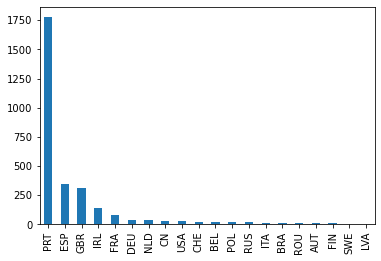

In [97]:
# plot country results
ld['country'].value_counts()[:20].plot(kind='bar')

In [111]:
# Try to find prediction of amount of people arriving at hotels each month 
correlation = ld.corr()["arrival_date_week_number"]
correlation.abs().sort_values(ascending=False)[1:]

adr                               0.586394
company                           0.291586
arrival_date_day_of_month         0.131951
children                          0.121948
days_in_waiting_list              0.106701
total_of_special_requests         0.094404
stays_in_weekend_nights           0.049542
stays_in_week_nights              0.047716
babies                            0.041718
booking_changes                   0.039783
adults                            0.019274
agent                             0.015289
lead_time                         0.015242
is_canceled                       0.010482
required_car_parking_spaces       0.006884
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: arrival_date_week_number, dtype: float64

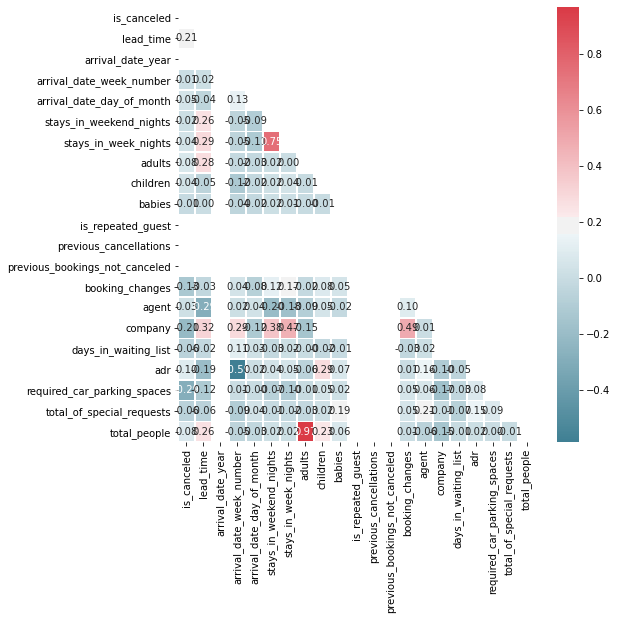

In [136]:
corr = ld.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
# from this graph we see that the targeted 'arrival_date_week_numbers' 
# 'adr', 'children', 'adult', 'babies', 'total_of_specail_requests'

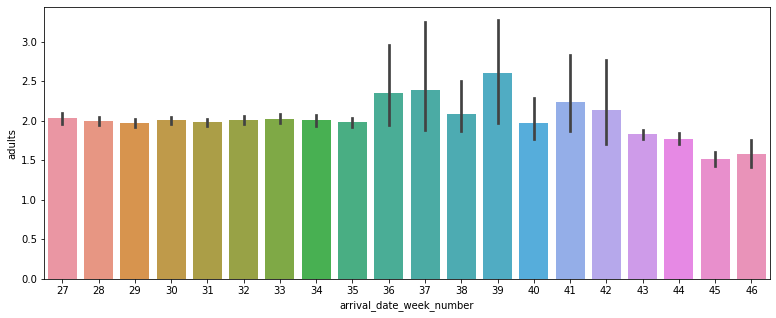

In [137]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'adults', data = ld)

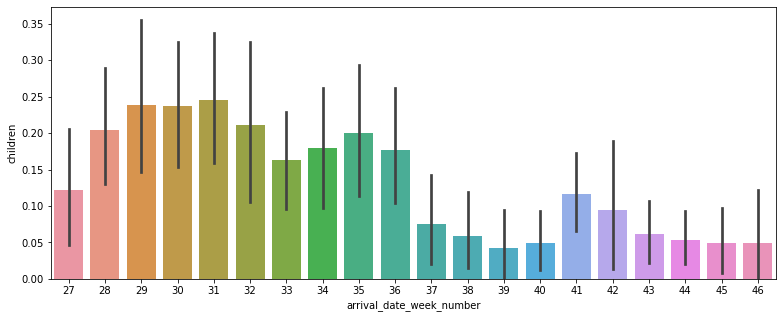

In [138]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'children', data = ld)

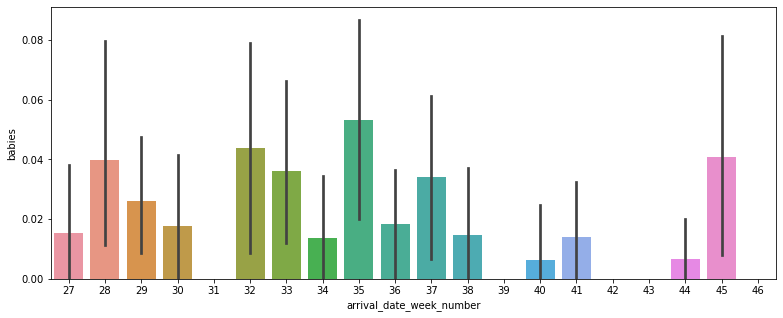

In [139]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'babies', data = ld)

In [130]:
# sum of all people each month
sum_column = ld["adults"] + ld["children"] + ld['babies']
ld["total_people"] = sum_column
print(ld['total_people'])

0       2.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
2994    1.0
2995    2.0
2996    1.0
2997    3.0
2998    2.0
Name: total_people, Length: 2999, dtype: float64


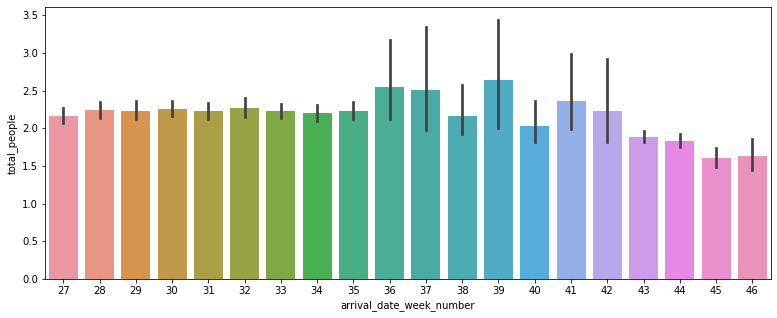

In [140]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

In [147]:
# data prediction
# splitting dataset
ld_new = ld.copy()[['adr', 'children', 'adults', 'babies', 'total_of_special_requests', 'arrival_date_week_number']]
ld_new.head()

,adr,children,adults,babies,total_of_special_requests,arrival_date_week_number
0,0.0,0.0,2,0,0,27
1,0.0,0.0,2,0,0,27
2,75.0,0.0,1,0,0,27
3,75.0,0.0,1,0,0,27
4,98.0,0.0,2,0,1,27


In [148]:
x = ld_new.drop(['arrival_date_week_number'], axis=1)
y = ld_new['arrival_date_week_number']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [174]:
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m = model_LogReg_Asli.coef_[0][0]
c = model_LogReg_Asli.intercept_[0]

RandomForestClassifier(max_depth=10, n_estimators=200)

In [175]:
y_pred = model_RF1.predict(x_test)

In [176]:
print(model_RF1.score(x_train,y_train))
print(model_RF1.score(x_test,y_test))

0.47978324301792413
0.0
